Base on  [BobaZooba hw](https://github.com/BobaZooba/DeepNLP/blob/2020/Week%203/Homework%202.ipynb)

In [2]:
import math
import numpy as np

from tqdm import tqdm

import torch

import zipfile

import seaborn as sns

from data import Downloader, Parser

### Загружаем файл с эмбеддингами для английского языка
Они нам понадобятся чуть позже.  
Для других языков можете найти здесь: https://fasttext.cc/docs/en/crawl-vectors.html

In [3]:
# раскомментируйте и скачайте
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2024-12-19 15:52:29--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.51, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   198MB/s    in 3.3s    

2024-12-19 15:52:33 (195 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [4]:
# путь к данным
data_path = './data'

### Читалка данные
Не стоит вдаваться в подробности, просто эта штука скачивает данные, затем парсит и делает из них три датасета:
- тренировочный
- валидационный
- неразмеченный

Неразмеченные данные необазятельны, но могут вам понадобиться, например, для языковой модели или улучшения эмбеддингов.

In [5]:
downloader = Downloader(data_path=data_path)

In [6]:
downloader.run()

multiple: 100%|██████████| 17/17 [00:08<00:00,  1.96it/s]


In [7]:
parser = Parser(data_path=data_path)

In [8]:
unlabeled, train, valid = parser.run()

Reading: 100%|██████████| 38/38 [02:45<00:00,  4.34s/it]


### Посмотрим на датасеты

In [9]:
unlabeled

,question,response
0,will this fit a 2007 gmc yukon denali? also i...,yes it will
1,will this work with a 2011 frontier?,yes it should. i'm pretty sure the frontier an...
2,has anyone tried this with the 2240 (.22) mode...,"yes, i have one on my 2240, and it works great..."
3,can you measure the actual width? a little ove...,hi there! the actual internal dimensions on th...
4,how much weight in pounds can they hold,"i've piled as much as 40 pounds in one, just m..."
...,...,...
137275,does this work for charging my kindle fire hd?,i have a samsung galaxy s2 and the cord charge...
137276,are you able to fold this scooter?,no it does not fold like a razor
137277,will this screen work and fit on the white spr...,yes it will but of course it will be blue
137278,if i want to buy a waterproof cover for under ...,"mark, it would depend on which configuration y..."


In [10]:
train

,question,response,category
0,is it touchtone or a rotary dial? i couldn't ...,"it's a touchtone, but made to look like a rota...",office products
1,will this fit a 2012 silverado 4x4 with tow hooks,no i don't think it will. i was gonna take it ...,automotive
2,will this work on a 10 speed schwinn skyline? ...,"hi theresa, i'm not familier with the skyline ...",sports and outdoors
3,do the pencil shavings come out the opening if...,"ha! that is a very good question, which i have...",office products
4,how does this stuff smell? is it strong?,it has a light citrus smell. it is not strong ...,beauty
...,...,...,...
249995,how many gigabites does this phone have,i think the maximum is 32 gb,sports and outdoors
249996,what version of windows does this run?,i believe it's windows mobile 6.5,sports and outdoors
249997,where can i find it in st louis mo area?,i googled and found the paul mitchell school a...,beauty
249998,"will these work for someone who is 5'4""?","yes, i am just shy of 5'4"" and they work great...",sports and outdoors


In [11]:
valid

,question,response,category
0,can you attach near tailgate? or anywhere in b...,"yes, i have mine attached to the rear of the b...",automotive
1,"can i use toppik while using monoxidil? if so,...",i put minox in my hair when it has 'enhancers'...,beauty
2,"i bought at&t regular plan iphone 4s ( ""not u...","yes, it will work. when you purchase the sim j...",cell phones and accessories
3,"the description says it fits openings 26"" - 42...","for safety reasons, i would say no. i don't th...",baby
4,is the dock compatible with ios 7? several ge...,i don't know it hadn't been used,cell phones and accessories
...,...,...,...
49995,will these fit on my 2005 chevy suburban 1500 ...,look on the arnott website to see if these wil...,automotive
49996,does this also look good on black phones? a re...,that's silly that they said that. as it turn...,cell phones and accessories
49997,information you provide is minimal! my dog is ...,sizing chart is available at www.petflect.com.,pet supplies
49998,is this battery-powered or ac?,it's not battery powered. ac cord is provided.,baby


## Задача
Классифицировать поле question в одну из категорий в поле category.  
Это данные с сервиса Amazon QA, то есть такой сервис, на котором можно задать вопрос и получить ответ от других пользователей.

Идея задачи такая: давайте поможем клиенту определить в какую категорию выложить его вопрос, чтобы быстрее получить максимально релевантный ответ.

### Перевод класса в индекс
Мы сделаем некоторый маппер, который текст класса переводит в конкретный уникальный индекс. Нам это понадобиться, потому что наша
модель работает не напрямую с классом, а с его индексом.

In [12]:
# проверим, что в трейне и валидации одинаковые категории
set(train.category.unique().tolist()) == set(valid.category.unique().tolist())

True

In [13]:
unique_categories = set(train.category.unique().tolist() + valid.category.unique().tolist())

In [14]:
category2index = {category: index for index, category in enumerate(unique_categories)}

In [15]:
category2index

{'beauty': 0,
 'pet supplies': 1,
 'office products': 2,
 'baby': 3,
 'grocery and gourmet food': 4,
 'cell phones and accessories': 5,
 'sports and outdoors': 6,
 'automotive': 7}

In [16]:
train['target'] = train.category.map(category2index)
valid['target'] = valid.category.map(category2index)

In [17]:
train

,question,response,category,target
0,is it touchtone or a rotary dial? i couldn't ...,"it's a touchtone, but made to look like a rota...",office products,2
1,will this fit a 2012 silverado 4x4 with tow hooks,no i don't think it will. i was gonna take it ...,automotive,7
2,will this work on a 10 speed schwinn skyline? ...,"hi theresa, i'm not familier with the skyline ...",sports and outdoors,6
3,do the pencil shavings come out the opening if...,"ha! that is a very good question, which i have...",office products,2
4,how does this stuff smell? is it strong?,it has a light citrus smell. it is not strong ...,beauty,0
...,...,...,...,...
249995,how many gigabites does this phone have,i think the maximum is 32 gb,sports and outdoors,6
249996,what version of windows does this run?,i believe it's windows mobile 6.5,sports and outdoors,6
249997,where can i find it in st louis mo area?,i googled and found the paul mitchell school a...,beauty,0
249998,"will these work for someone who is 5'4""?","yes, i am just shy of 5'4"" and they work great...",sports and outdoors,6


### Torch Dataset, DataLoader

Очень важная абстракция для торча.
Мы всегда будем ее использовать, чтобы работать с данными.

Dataset - класс, от которого нужно наследоваться, чтобы написать свой обработчик данных. Внутри него нужно реализовать два метода,
о которых будет чуть ниже. То есть в данном классе вы описывает как нужно преобразовать ваши данные в торчовый формат. Перевести тексты
в индексы слов и тд.

DataLoader - класс, который будет за вас семплировать данные батчами. Это итератор, поэтому формат работы с ним примерно такой:
```python
for batch in data_loader:
    ...
```
То есть на каждой итерации отдается по одному батчу данных. Итерирование заканчивается, когда вы пройдете все батчи.

Зачем нужны эти абстракции? Чтобы упростить и унифицировать работу с данными.
Вообще вы можете реализовать что-то свое, но это упрощение данной задачи.

In [18]:
from torch.utils.data import Dataset, DataLoader

In [19]:
# игрушечный датасет
# 121535 примера, 4 фичи, 3 класса
some_data_x = np.random.rand(121535, 4)
some_data_y = np.random.randint(3, size=(121535,))

In [20]:
# просто рандомные цифры
some_data_x[:10]

array([[0.06235632, 0.83424686, 0.9093553 , 0.22246943],
       [0.83598798, 0.93813933, 0.72606097, 0.67651983],
       [0.37787448, 0.94616983, 0.3023006 , 0.00633761],
       [0.70885355, 0.38488939, 0.23993567, 0.13289319],
       [0.23009305, 0.51512814, 0.4792522 , 0.03255465],
       [0.01352133, 0.69671514, 0.28519801, 0.82389855],
       [0.96226484, 0.66577289, 0.74330126, 0.29147828],
       [0.63319802, 0.21842683, 0.04977264, 0.23909931],
       [0.32189131, 0.40855565, 0.93820933, 0.69419673],
       [0.93246881, 0.87583981, 0.91735419, 0.6213183 ]])

In [21]:
# и классы
some_data_y

array([1, 2, 1, ..., 0, 0, 1])

### Пример надобности
Для обучения модели вам нужно подавать в нее батчи данных. Как бы могли это реализовать, если бы у нас не было Dataset и DataLoader

In [22]:
batch_size = 16

for i_batch in range(math.ceil(some_data_x.shape[0] / batch_size)):

    x_batch = some_data_x[i_batch * batch_size:(i_batch + 1) * batch_size]
    y_batch = some_data_y[i_batch * batch_size:(i_batch + 1) * batch_size]

    x_batch = torch.tensor(x_batch)
    y_batch = torch.tensor(y_batch)

    break

In [23]:
x_batch

tensor([[0.0624, 0.8342, 0.9094, 0.2225],
        [0.8360, 0.9381, 0.7261, 0.6765],
        [0.3779, 0.9462, 0.3023, 0.0063],
        [0.7089, 0.3849, 0.2399, 0.1329],
        [0.2301, 0.5151, 0.4793, 0.0326],
        [0.0135, 0.6967, 0.2852, 0.8239],
        [0.9623, 0.6658, 0.7433, 0.2915],
        [0.6332, 0.2184, 0.0498, 0.2391],
        [0.3219, 0.4086, 0.9382, 0.6942],
        [0.9325, 0.8758, 0.9174, 0.6213],
        [0.0726, 0.9489, 0.5884, 0.2607],
        [0.1437, 0.3785, 0.1973, 0.0362],
        [0.9884, 0.3480, 0.3516, 0.4183],
        [0.5069, 0.3045, 0.7292, 0.1063],
        [0.3173, 0.2958, 0.2919, 0.7791],
        [0.9016, 0.8891, 0.9362, 0.6446]], dtype=torch.float64)

In [24]:
x_batch.shape, y_batch.shape

(torch.Size([16, 4]), torch.Size([16]))

Это достаточно простой пример. Мы смогли справиться сами, но почти всегда обработка данных для подачи ее в модель делается сложнее.
И некоторые вещи часто нужны более одного раза, например, если мы хотим каждую эпоху шафлить наши данные, чтобы получать разные батчи.
Мы сможем это сделать, но для этого нам придется тащить с собой некоторый код из проекта в проект. К тому же совместная разработка или
просто чтение чужого кода сильно упрощается, когда вы используете унифицированные форматы.

### Перейдем к Dataset
И обернем наши данные в этот обработчик

In [25]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # нужно обязательно определить эту функцию
        # должна возвращать размер датасета
        # нужен для DataLoader, чтобы семплировать батчи

        return len(self.data_x)

    def __getitem__(self, idx):

        # еще нужно определить этот метод
        # то есть как мы будем доставать наши данные по индексу

        return self.data_x[idx], self.data_y[idx]

In [26]:
some_dataset = ToyDataset(some_data_x, some_data_y)

In [27]:
some_dataset[5], some_dataset[467]

((array([0.01352133, 0.69671514, 0.28519801, 0.82389855]), 0),
 (array([0.76050212, 0.03923591, 0.55914517, 0.30236159]), 0))

### Кажется, что смысла в этом нет, но это самый простой пример

### DataLoader
В него мы можем задать некоторые параметры, например, батч сайз и нужно ли шафлить каждый новый проход по данным эти самые данные,
чтобы получать разные батчи, то есть по разному компоновать эти батчи

In [28]:
some_loader = DataLoader(some_dataset, batch_size=16, shuffle=True)

In [29]:
for x, y in some_loader:
    break

x

tensor([[0.5612, 0.6841, 0.9520, 0.4773],
        [0.9214, 0.2900, 0.5976, 0.3401],
        [0.0900, 0.9807, 0.7267, 0.5684],
        [0.7806, 0.9780, 0.3356, 0.5007],
        [0.9667, 0.1985, 0.4421, 0.0289],
        [0.3137, 0.1095, 0.2791, 0.4470],
        [0.6148, 0.3574, 0.1271, 0.7323],
        [0.1231, 0.4442, 0.8186, 0.7239],
        [0.5636, 0.4982, 0.3769, 0.4480],
        [0.8124, 0.6943, 0.1553, 0.8264],
        [0.8547, 0.7479, 0.6058, 0.2200],
        [0.2695, 0.4481, 0.7642, 0.7627],
        [0.0979, 0.3901, 0.3205, 0.8867],
        [0.3253, 0.3976, 0.4907, 0.2362],
        [0.6622, 0.1805, 0.5497, 0.9173],
        [0.6234, 0.4192, 0.9299, 0.6769]], dtype=torch.float64)

In [30]:
x.shape

torch.Size([16, 4])

In [31]:
for x, y in some_loader:
    pass

len(x)

15

In [32]:
# почему 15?
# потому что количество наших данных нацело не делится на 16
# и поэтому последний батч меньше 16-ти
len(some_dataset) % 16

15

### Усложним обработчик

In [33]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # нужно обязательно определить эту функцию
        # должна возвращать размер датасета
        # нужен для DataLoader, чтобы семплировать батчи

        return len(self.data_x)

    @staticmethod
    def pow_features(x, n=2):

        return x ** n

    @staticmethod
    def log_features(x):

        return np.log(x)

    def __getitem__(self, idx):

        # еще нужно определить этот метод
        # то есть как мы будем доставать наши данные по индексу

        x = self.data_x[idx]

        # внутри датасета мы можем делать все что угодно с нашими данными
        # например выше определим функции, которые добавляют степенные фичи
        x_p_2 = self.pow_features(x, n=2)
        x_p_3 = self.pow_features(x, n=3)
        # и еще возьмем логарифмические фичи
        x_log = self.log_features(x)

        # сконкатенируем наши фичи
        x = np.concatenate([x, x_p_2, x_p_3, x_log])

        y = self.data_y[idx]

        return x, y

In [34]:
toy_dataset = ToyDataset(some_data_x, some_data_y)

In [35]:
toy_loader = DataLoader(dataset=toy_dataset, batch_size=128)

In [36]:
for x, y in toy_loader:
    break

In [37]:
x.shape

torch.Size([128, 16])

In [38]:
# заметим, что мы сразу получаем торчовый формат данных, который получился из автоматического преобразования из numpy
x

tensor([[ 0.0624,  0.8342,  0.9094,  ..., -0.1812, -0.0950, -1.5030],
        [ 0.8360,  0.9381,  0.7261,  ..., -0.0639, -0.3201, -0.3908],
        [ 0.3779,  0.9462,  0.3023,  ..., -0.0553, -1.1963, -5.0613],
        ...,
        [ 0.8041,  0.5263,  0.3635,  ..., -0.6418, -1.0119, -0.3089],
        [ 0.7369,  0.2095,  0.3778,  ..., -1.5630, -0.9733, -3.6795],
        [ 0.7610,  0.6498,  0.7285,  ..., -0.4311, -0.3168, -0.5185]],
       dtype=torch.float64)

In [39]:
y

tensor([1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
        1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
        0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0,
        2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0,
        2, 0, 1, 1, 2, 0, 0, 0])

In [40]:
# сделаем небольшую модель и посчитаем лосс

model = torch.nn.Sequential(torch.nn.Linear(16, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3))

criterion = torch.nn.CrossEntropyLoss()

with torch.no_grad():

    prediction = model(x.float())

    loss = criterion(prediction, y)

loss.item()

1.1572014093399048

### Сделаем датасет для наших текстовых данных
Будем отдавать строку и таргет по индексу

In [41]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets):
        super().__init__()

        self.texts = texts
        self.targets = targets

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        return text, target

In [42]:
# подготовим данные
train_x = list(train.question)
train_y = list(train.target)

valid_x = list(valid.question)
valid_y = list(valid.target)

In [43]:
train_dataset = TextClassificationDataset(texts=list(train.question), targets=list(train.target))

In [44]:
# семплируем данные
text, target = train_dataset[0]

In [45]:
text

"is it touchtone or a rotary dial?  i couldn't tell by the picture"

In [46]:
target

2

### Смысл обработчика
Состоит в том, что нам нужно преобразовать наши данные в формат, который мы уже сможем передать в модель.
Сейчас у нас строки, а торч ничего не знает про строки, ему нужны тензоры.

### Загружаем эмбеддинги
Чтобы работать с текстовыми данными мы можем разбить наши строки на слова, а слова перевести в вектора. Откуда нам взять эти вектора?
Мы говорили про такой метод как word2vec и в начале этой тетрадки загружали файл с этими самыми векторами.

In [47]:
import zipfile
import numpy as np

from tqdm import tqdm

In [48]:
def load_embeddings(zip_path, filename, pad_token='PAD', max_words=100_000, verbose=True):

    vocab = dict()
    embeddings = list()

    with zipfile.ZipFile(zip_path) as zipped_file:
        with zipped_file.open(filename) as file_object:

            vocab_size, embedding_dim = file_object.readline().decode('utf-8').strip().split()

            vocab_size = int(vocab_size)
            embedding_dim = int(embedding_dim)

            # в файле 1 000 000 слов с векторами, давайте ограничим для простоты этот словарь
            max_words = vocab_size if max_words <= 0 else max_words

            # добавим пад токен и эмбеддинг в нашу матрицу эмбеддингов и словарь
            vocab[pad_token] = len(vocab)
            embeddings.append(np.zeros(embedding_dim))

            progress_bar = tqdm(total=max_words, disable=not verbose)

            for line in file_object:
                parts = line.decode('utf-8').strip().split()

                token = ' '.join(parts[:-embedding_dim]).lower()

                if token in vocab:
                    continue

                word_vector = np.array(list(map(float, parts[-embedding_dim:])))

                vocab[token] = len(vocab)
                embeddings.append(word_vector)

                progress_bar.update()

                if len(vocab) == max_words:
                    break

            progress_bar.close()

    embeddings = np.stack(embeddings)

    return vocab, embeddings

In [49]:
vocab, embeddings = load_embeddings('./wiki-news-300d-1M.vec.zip', 'wiki-news-300d-1M.vec', max_words=100_000)

100%|█████████▉| 99999/100000 [00:11<00:00, 8520.78it/s]


### Посмотрим на ближайших соседей слова по эмбеддингам

In [50]:
index2token = {index: token for token, index in vocab.items()}

In [51]:
emb_norms = np.linalg.norm(embeddings, axis=1)

In [52]:
def get_k_nearest_neighbors(word, embeddings, emb_norms, vocab, index2token, k=5):

    if word not in vocab:
        print('Not in vocab')
        return

    word_index = vocab[word]

    word_vector = embeddings[word_index]
    word_vector = np.expand_dims(word_vector, 0)

    scores = (word_vector @ embeddings.T)[0]

    # переводим в косинусы, поделив на нормы векторов
    # эпсилон 1e-6 для того, чтобы не делить на 0
    scores = scores / (emb_norms + 1e-6) / emb_norms[word_index]

    # 1:k+1 потому что первый вариант это само слово
    for idx in scores.argsort()[::-1][1:k+1]:
        print(f'Слово {index2token[idx]} близко на {scores[idx]:.2f} к слову {word}')

In [53]:
get_k_nearest_neighbors('anna', embeddings, emb_norms, vocab, index2token)

Слово maria близко на 0.73 к слову anna
Слово emma близко на 0.66 к слову anna
Слово kristina близко на 0.65 к слову anna
Слово laura близко на 0.65 к слову anna
Слово emily близко на 0.65 к слову anna


In [54]:
get_k_nearest_neighbors('mom', embeddings, emb_norms, vocab, index2token)

Слово dad близко на 0.85 к слову mom
Слово mum близко на 0.78 к слову mom
Слово mother близко на 0.76 к слову mom
Слово moms близко на 0.75 к слову mom
Слово kid близко на 0.68 к слову mom


In [55]:
get_k_nearest_neighbors('have', embeddings, emb_norms, vocab, index2token)

Слово has близко на 0.78 к слову have
Слово been близко на 0.75 к слову have
Слово 've близко на 0.75 к слову have
Слово had близко на 0.74 к слову have
Слово ahve близко на 0.74 к слову have


In [56]:
get_k_nearest_neighbors('money', embeddings, emb_norms, vocab, index2token)

Слово cash близко на 0.72 к слову money
Слово funds близко на 0.72 к слову money
Слово monies близко на 0.72 к слову money
Слово moneys близко на 0.67 к слову money
Слово dosh близко на 0.63 к слову money


In [57]:
get_k_nearest_neighbors('music', embeddings, emb_norms, vocab, index2token)

Слово musical близко на 0.71 к слову music
Слово songs близко на 0.69 к слову music
Слово tunes близко на 0.69 к слову music
Слово musics близко на 0.68 к слову music
Слово composer близко на 0.68 к слову music


### Выбор метода токенизации
У нас сейчас есть маппинг, что некоторому слову соответствует некоторый эмбеддинг этого слова.
Токенизация - процесс разбиения текста на токены, то есть части этого текста.   
Чем "слово" отличается от "токена": токен это более обобщенное понятие, то есть, например, цифра это токен

In [58]:
# про различия подробнее можно найти, например, здесь
# https://stackoverflow.com/questions/50240029/nltk-wordpunct-tokenize-vs-word-tokenize
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [59]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация по пробелу
    tokens = sample.split()

    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:01<00:00, 200486.22it/s]

Мы не знаем 512226 слов из 3601522 слов в датасете
Что составляет 14.22% датасета

Уникальных неизвестных слов: 119261


In [60]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация
    tokens = wordpunct_tokenize(sample)

    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:03<00:00, 67136.91it/s]

Мы не знаем 111061 слов из 4198253 слов в датасете
Что составляет 2.65% датасета

Уникальных неизвестных слов: 36109


In [61]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [62]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация
    tokens = word_tokenize(sample)

    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:41<00:00, 6061.03it/s]


Мы не знаем 148969 слов из 4101955 слов в датасете
Что составляет 3.63% датасета

Уникальных неизвестных слов: 52698


### Результаты
- Скорость у word_tokenize сильно ниже, чем у wordpunct_tokenize
- Используя word_tokenize, мы теряем примерно 1% информации из датасета по сравнению с wordpunct_tokenize

### Выбор очевиден в сторону wordpunct_tokenize

In [63]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets, vocab):
        super().__init__()

        self.texts = texts
        self.targets = targets
        self.vocab = vocab

    def __len__(self):
        return len(self.texts)

    def tokenization(self, text):

        tokens = wordpunct_tokenize(text)

        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]

        return token_indices

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        tokenized_text = self.tokenization(text)

        # переведем наши индексы токенов в торчовый тензор
        # таргет переведется самостоятельно
        tokenized_text = torch.tensor(tokenized_text)

        return tokenized_text, target

In [64]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [65]:
x, y = train_dataset[5]

In [66]:
x

tensor([ 128,   97,   30,  217,   29,  149,  211,   37,   28,   23, 6308,  105,
        1209,   15,    2,  191,  157, 1445])

In [67]:
y

5

In [68]:
# мы можем восстановить текст обратно по индексам слов
[index2token[idx.item()] for idx in x]

['how',
 'do',
 'you',
 'take',
 'this',
 'case',
 'off',
 '?',
 'i',
 "'",
 've',
 'been',
 'trying',
 'for',
 'the',
 'last',
 '20',
 'minutes']

### У нас остается проблема разных длин текстов
Чтобы поместить батч текстов в один тензор нам нужны одинаковые длины

In [69]:
## это не отработает, можете раскомментировать и проверить

# x = [
#     [1, 2, 3],
#     [1, 2, 3, 4, 5],
#     [1, 2, 3, 4, 5, 6, 7]
# ]

# torch.tensor(x), torch.tensor(x).shape

In [70]:
# это сработает

x = [
    [1, 2, 3, 0, 0, 0, 0],
    [1, 2, 3, 4, 5, 0, 0],
    [1, 2, 3, 4, 5, 6, 7]
]

torch.tensor(x), torch.tensor(x).shape

(tensor([[1, 2, 3, 0, 0, 0, 0],
         [1, 2, 3, 4, 5, 0, 0],
         [1, 2, 3, 4, 5, 6, 7]]),
 torch.Size([3, 7]))

### Длина текста
Нам нужно понять до какой длины нам падить каждый наш пример.
Мы можем найти в наших данных максимальную длину примера в токенах и падить до этой длины, но у этого подхода есть минус:
у нас могут быть несколько текстов с аномально большой длиной, то есть некоторые выбросы.  

В таком случае нам легче ограничить длину этих текстов до определенной статистики по нашему датасет, то есть, например, 95% наших текстов
длиной в 25 слов и нам этого достаточно. То есть мы ограничимся этой длиной, потому что почти весь датасет влезает в эту длину
и нам не нужно будет падить до большой длины.

Паддинг нужен нам для того, чтобы мы могли поместить разные примеры в один батч, но мы не хотим учитывать эти токены, то есть
по сути это будут холостые прогоны и за счет этого компромисса, что бОльшая часть датасета не больше n слов мы можем оптимизировать
наше обучение.

<br>


> Почему бы нам просто не выкинуть эти длинные тексты?

Дело в том, что мы хотим прийти к некоторому компромиссу между максимальной длиной и потерей информации. Если мы возьмем 95-й перцинтиль наших длин (то есть 95% наших текстов не больше n), то, выкинув остальные 5%, мы потеряем существенную часть примеров.
С другой стороны может показаться неправильным ограничение длины и это действительно может сломать смысл примеры, но зачастую этим
принебрегают.

In [71]:
train_lengths = [len(wordpunct_tokenize(sample)) for sample in tqdm(train_x)]

100%|██████████| 250000/250000 [00:01<00:00, 155073.59it/s]


<ipython-input-72-6fda2ba84acf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_lengths)


<Axes: ylabel='Density'>

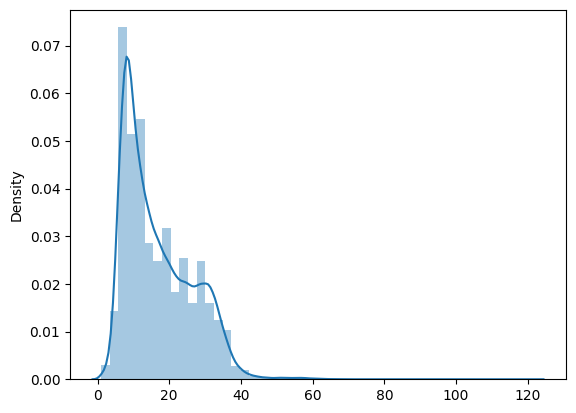

In [72]:
sns.distplot(train_lengths)

In [73]:
# видим большие выбросы в данных
# 97% наших текстов не больше вот стольки токенов
np.percentile(train_lengths, 95)

34.0

In [74]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets, vocab, pad_index=0, max_length=32):
        super().__init__()

        self.texts = texts
        self.targets = targets
        self.vocab = vocab

        self.pad_index = pad_index
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def tokenization(self, text):

        tokens = wordpunct_tokenize(text)

        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]

        return token_indices

    def padding(self, tokenized_text):

        tokenized_text = tokenized_text[:self.max_length]

        tokenized_text += [self.pad_index] * (self.max_length - len(tokenized_text))

        return tokenized_text

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        tokenized_text = self.tokenization(text)
        tokenized_text = self.padding(tokenized_text)

        tokenized_text = torch.tensor(tokenized_text)

        return tokenized_text, target

In [75]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [76]:
x, y = train_dataset[0]
x

tensor([   14,    20,    21,     8, 22601, 13839,    37,    28,  4937,    23,
          535,  1283,    25,     2,  1072,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [77]:
[index2token[idx.item()] for idx in x]

['is',
 'it',
 'or',
 'a',
 'rotary',
 'dial',
 '?',
 'i',
 'couldn',
 "'",
 't',
 'tell',
 'by',
 'the',
 'picture',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD']

In [78]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)
valid_dataset = TextClassificationDataset(texts=valid_x, targets=valid_y, vocab=vocab)

train_loader = DataLoader(train_dataset, batch_size=128)
valid_loader = DataLoader(valid_dataset, batch_size=128)

In [79]:
for x, y in train_loader:
    break

In [80]:
x.shape, y.shape

(torch.Size([128, 32]), torch.Size([128]))

### Как мы можем задавать слои

In [81]:
from torch import nn

In [82]:
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=embeddings.shape[-1],
                               padding_idx=0)

In [83]:
x_embed = embedding_layer(x)

In [84]:
x_embed

tensor([[[-5.8665e-01,  1.4364e-01,  5.9469e-01,  ..., -8.7226e-01,
          -2.7652e+00, -1.3129e+00],
         [-6.0602e-01,  1.0239e+00, -3.0449e-01,  ..., -5.7057e-01,
           6.9663e-01,  3.5899e-02],
         [ 1.1470e+00, -4.1391e-01, -3.1332e-01,  ..., -1.0148e+00,
          -5.0381e-01,  1.1977e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[ 1.1228e+00, -1.6865e+00, -2.3561e+00,  ..., -1.4264e+00,
          -5.6334e-02,  5.1448e-01],
         [-1.6764e+00, -2.8555e-01,  1.4857e-02,  ...,  7.1553e-02,
           9.1447e-01,  1.3579e+00],
         [ 6.6632e-01, -1.1009e+00, -7.5521e-01,  ...,  1.0486e+00,
          -6.0068e-01,  1.1435e+00],
         ...,
         [ 0.0000e+00,  0

In [85]:
x_embed.shape

torch.Size([128, 32, 300])

### Но мы ведь прочитали нашу матрицу эмбеддингов
Таким образом она инициализируется предобученными весами.  
При такой инициализации по умолчанию она замораживается, внутри ```.from_pretrained(embeddings, padding_idx=0)``` есть флаг ```freeze```, который отвечает за необходимость заморозки весов. То есть эти веса в процессе обучения не будут обновляться.

In [86]:
embeddings = torch.tensor(embeddings).float()

In [87]:
embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)

In [88]:
x_embed = embedding_layer(x)

### Немного LSTM
Ниже будет про ```batch_first=True```

In [89]:
lstm = nn.LSTM(input_size=300, hidden_size=128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)

In [90]:
x_lstm, _ = lstm(x_embed)

In [91]:
# 256 потому что это конкатенация лстмки, которая прочитала текст слева направо
# и лстмки, которая прочитала текст справа налево
x_lstm.shape

torch.Size([128, 32, 256])

In [92]:
# избавились от временной размерности
x_lstm.mean(dim=1).shape

torch.Size([128, 256])

### Сделаем свою сеть
В первой домашке в конце есть более подробная информация почему мы используем классы.

In [93]:
class DeepAverageNetwork(nn.Module):

    def __init__(self, embeddings, linear_1_size, linear_2_size, n_classes):
        super().__init__()

        self.embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)

        self.batch_norm = nn.BatchNorm1d(num_features=embeddings.shape[-1])

        self.linear_1 = nn.Linear(in_features=embeddings.shape[-1], out_features=linear_1_size)
        self.linear_2 = nn.Linear(in_features=linear_1_size, out_features=linear_2_size)
        self.linear_3 = nn.Linear(in_features=linear_2_size, out_features=n_classes)

    def forward(self, x):

        # переводим индексы слов в эмбеддинги этих слов
        # (batch_size, sequence_length) -> (batch_size, sequence_length, embedding_dim)
        x = self.embedding_layer(x)

        # агрегируем наши эмбеддинги по размерности время
        # (batch_size, sequence_length, embedding_dim) -> (batch_size, embedding_dim)
        x = x.sum(dim=1)

        # делаем нормирование
        # (batch_size, embedding_dim) -> (batch_size, embedding_dim)
        x = self.batch_norm(x)

        # прогоняем через первый линейный слой
        # (batch_size, embedding_dim) -> (batch_size, linear_1_size)
        x = self.linear_1(x)

        # применяем нелинейность
        # (batch_size, linear_1_size) -> (batch_size, linear_1_size)
        x = torch.relu(x)

        # прогоняем через второй линейный слой
        # (batch_size, linear_1_size) -> (batch_size, linear_2_size)
        x = self.linear_2(x)

        # применяем нелинейность
        # (batch_size, linear_2_size) -> (batch_size, linear_2_size)
        x = torch.relu(x)

        # переводим с помощью линейного преобразования в количество классов
        # (batch_size, linear_2_size) -> (batch_size, n_classes)
        x = self.linear_3(x)

        ## по идеи здесь должен был быть софтмакс
        ## но мы будем использовать лосс nn.CrossEntropyLoss()
        ## в его документации написано
        ## This criterion combines :func:`nn.LogSoftmax` and :func:`nn.NLLLoss` in one single class.
        ## это некоторая оптимизация, которая включает в себя сразу и софтмакс и сам negative log likelihood лосс
        ## так как у нас в лоссе есть софтмакс, то мы не будем применять его в сетке
        ## на этапе предсказания (а не обучения) мы будем отдельно делать софтмакс для получения распределения классов
        ##
        ## (batch_size, n_classes) -> (batch_size, n_classes)
        # x = torch.softmax(x, dim=-1)

        return x

In [94]:
model = DeepAverageNetwork(embeddings=embeddings,
                           linear_1_size=256,
                           linear_2_size=128,
                           n_classes=len(category2index))

In [95]:
criterion = nn.CrossEntropyLoss()

# задайте оптимизатор
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Напишите цикл обучения
Что он должен в себя включать:
1. Получение предсказаний модели
1. Расчет функции потерь
1. Расчет градиентов
1. Шаг градиентного спуска
1. Обнуление градиентов
1. Записывание значения лосса

In [96]:
losses = list()

# в обучении моделей у нас есть такая ситуация, что некоторые слои ведут себя по разному на этапе тренировки и предсказания
# например, батч норм (а так же все остальные нормировки) и дропаут
# это переводит модель в режим тренировки
model.train()

for x, y in train_loader:
    predictions = model(x)

    loss = criterion(predictions, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    losses.append(loss.item())

### Напишите цикл валидации
Что он должен в себя включать:
1. Получение предсказаний модели
1. Расчет функции потерь
1. Записывание значения лосса

Также с помощью контекста ```with torch.no_grad():``` можно явно указать торчу не сохранять необходимые параметры для расчета градиентов. Обязательно для режима предсказания.

In [97]:
losses = list()

# это переводит модель в режим предсказания
# то есть фиксируются статистики батч норма, дропаут не выкидывает фичи
model.eval()

# заметьте, что мы поменяли наш лоадер на валидационный
for x, y in valid_loader:
    with torch.no_grad():
        predictions = model(x)

        loss = criterion(predictions, y)

        losses.append(loss.item())

### Проведите обучение несколько эпох
Одна эпоха - это один проход по датасету.  
Шаги:
- Поменяйте что-нибудь в модели, добавить дропаут и тд
- Остановите обучение с помощью early stopping
- Добавьте расчет метрик во время обучения и предсказания (например, micro F1). Чтобы это сделать вы можете, например, сохранять предсказания модели
- После обучения нарисуйте как по мере обучения меняется функция потерь на тренировочном и валидационном датасете, как меняется метрики
- Опционально: постройте confusion matrix

Подсказки:
- Чтобы корректно сохранять предсказания нужно переменную отсоединить от графа, то есть сделать ```x.detach()```

In [99]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# хранение значений функции потерь и предсказаний
train_losses = list()
valid_losses = list()
train_f1_scores = list()
valid_f1_scores = list()

n_epochs = 5
best_valid_loss = float('inf')
patience_counter = 0
early_stopping_patience = 2
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for n_epoch in range(n_epochs):
    print(f"Эпоха {n_epoch + 1}/{n_epochs}")

    # Обучение
    model.train()
    train_epoch_loss = 0
    train_predictions = []
    train_targets = []

    for x, y in train_loader:
        optimizer.zero_grad()

        # forward
        predictions = model(x)
        loss = criterion(predictions, y)
        train_epoch_loss += loss.item()

        # backward, optimization
        loss.backward()
        optimizer.step()

        # сохраняем предсказания и таргеты для вычисления метрик
        train_predictions.extend(torch.argmax(predictions, dim=1).detach().cpu().numpy())
        train_targets.extend(y.detach().cpu().numpy())

    # вычисление метрик на каждой эпохе обучения
    train_f1 = f1_score(train_targets, train_predictions, average='micro')
    train_losses.append(train_epoch_loss / len(train_loader))
    train_f1_scores.append(train_f1)
    print(f"train loss: {train_losses[-1]:.4f}, train micro F1: {train_f1:.4f}")

    # Валидация
    model.eval()
    valid_epoch_loss = 0
    valid_predictions = []
    valid_targets = []

    with torch.no_grad():
        for x, y in valid_loader:
            # forward
            predictions = model(x)
            loss = criterion(predictions, y)
            valid_epoch_loss += loss.item()

            # сохраняем предсказания и таргеты для вычисления метрик
            valid_predictions.extend(torch.argmax(predictions, dim=1).cpu().numpy())
            valid_targets.extend(y.cpu().numpy())

    # вычисление метрик на валидации
    valid_f1 = f1_score(valid_targets, valid_predictions, average='micro')
    valid_losses.append(valid_epoch_loss / len(valid_loader))
    valid_f1_scores.append(valid_f1)
    print(f"Valid Loss: {valid_losses[-1]:.4f}, Valid Micro F1: {valid_f1:.4f}")

    # early stopping
    if valid_losses[-1] < best_valid_loss:
        best_valid_loss = valid_losses[-1]
        patience_counter = 0
        # лучшую модель сохраняем
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Stopping early...")
            break

Эпоха 1/5
train loss: 0.9134, train micro F1: 0.6871
Valid Loss: 0.9128, Valid Micro F1: 0.6889
Эпоха 2/5
train loss: 0.8554, train micro F1: 0.7076
Valid Loss: 0.9006, Valid Micro F1: 0.6930
Эпоха 3/5
train loss: 0.8114, train micro F1: 0.7218
Valid Loss: 0.9024, Valid Micro F1: 0.6920
Эпоха 4/5
train loss: 0.7756, train micro F1: 0.7337
Valid Loss: 0.9065, Valid Micro F1: 0.6924
Stopping early...


In [100]:
# лучшая модель - для визуализаций
model.load_state_dict(torch.load("best_model.pt"))

<ipython-input-100-80d89b1745ee>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pt"))


<All keys matched successfully>

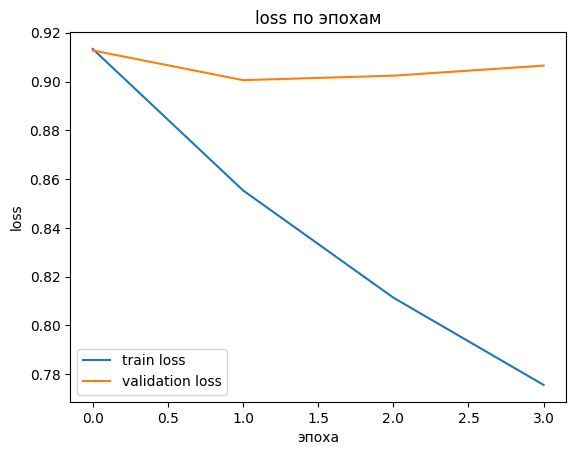

In [101]:
plt.figure()
plt.plot(train_losses, label="train loss")
plt.plot(valid_losses, label="validation loss")
plt.xlabel("эпоха")
plt.ylabel("loss")
plt.title("loss по эпохам")
plt.legend()
plt.show()

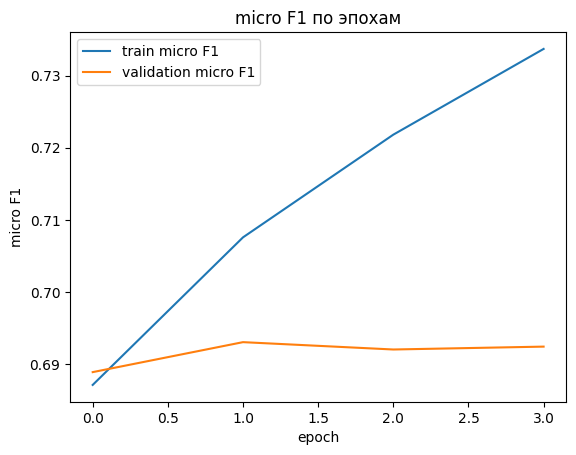

In [102]:
plt.figure()
plt.plot(train_f1_scores, label="train micro F1")
plt.plot(valid_f1_scores, label="validation micro F1")
plt.xlabel("epoch")
plt.ylabel("micro F1")
plt.title("micro F1 по эпохам")
plt.legend()
plt.show()

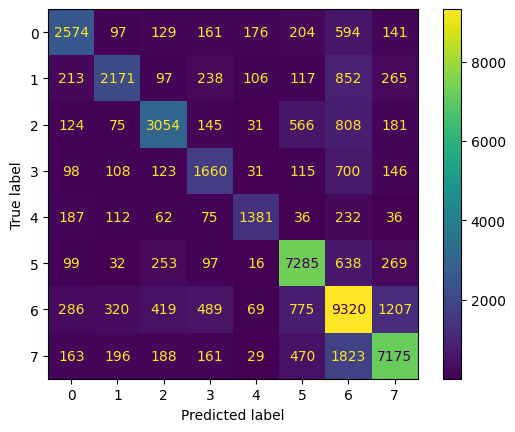

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(valid_targets, valid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Важные и не очень интуитивные моменты про LSTM в торче

По умолчанию LSTM принимает данные с такой размерностью:
```python
(seq_len, batch, input_size)
```
Сделано это с целью оптимизации на более низком уровне.  
Мы оперируем такими объектами:
```python
(batch, seq_len, input_size)
```
Чтобы LSTM у нас заработала правильно, мы можем либо передать параметр ```batch_first=True``` во время инициализации слоя,
либо транспонировать (поменять) первую и вторую размерность у нашего x перед подачей в слой.  
[Подробнее про LSTM](https://pytorch.org/docs/stable/nn.html#lstm)

- 128 - размер батча
- 64 - длина последовательности (количество слов)
- 1024 - эмбеддинг слова

In [104]:
x = torch.rand(128, 64, 1024)

In [105]:
# первый способ
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

pred, mem = lstm(x)

In [106]:
pred.shape

torch.Size([128, 64, 512])

In [107]:
# второй способ
lstm = torch.nn.LSTM(1024, 512)

# меняем размерность batch и seq_len местами
x_transposed = x.transpose(0, 1)
pred_transposed, mem = lstm(x_transposed)

In [108]:
# у нас все еще осталась размерность (seq_len, batch, input_size)
pred_transposed.shape

torch.Size([64, 128, 512])

In [109]:
# просто транспонируем еще раз
pred = pred_transposed.transpose(0, 1)
pred.shape

torch.Size([128, 64, 512])

### Еще важный момент про LSTM

The input can also be a packed variable length sequence. See [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) or [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) for details.

Это внутренняя конструкция торча, которая позволяет не читать токен ```PAD```, но все еще работать с батчами. То есть внутри батча мы можем передать лстмке, что у нас данные переменной длины. Не забудьте что на выход отдается [torch.nn.utils.rnn.PackedSequence](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.PackedSequence).

## Домашнее задание

1. Сделать класс нейронки, вписать необходимые операции, архитектура ниже
1. Написать обучалку (обобщить то, что было выше)
1. Добавить логирование
    1. Сохранять лосс на каждой итерции обучения __0.25 балла__
    1. Каждую эпоху сохранять лосс трейна и тест __0.25 балла__
    1. Каждую эпоху рассчитывать метрики __0.25 балла__
    1. Добавить прогресс бар, в котором показывается усредненный лосс последних 500-та итераций __0.25 балла__
1. Добавить early stopping __0.5 балла__
1. Нарисовать графики лосса, метрик, конфьюжин матрицу __0.5 балла__


### Архитектура (что можно попробовать)
1. Предобученные эмбеддинги. Почитайте [здесь](https://pytorch.org/docs/stable/nn.html#embedding) (from_pretrained) как вставить свои эмбеддинги, выше мы читали матрицу эмбеддингов. __0 баллов__
1. Дообучить эмбеддинги вместе с сетью и с другим learning rate (указывается в оптимизаторе). __2 балла__
1. Bidirectional LSTM. __1 балл__
1. Написать правильный правильный mean/max пулинг, который не учитывает паддинги, точнее их маскирует. __2 балла__
1. Добавить [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) и [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) для LSTM. Инфа [здесь](#Еще-важный-момент-про-LSTM) __2 балла__
1. Добавить spatial дропаут для входа LSTM (не просто стандартный пункт при инициализации LSTM) __1 балл__
1. Добавить BatchNorm/LayerNorm/Dropout/Residual/etc __2 балл__
1. Добавить шедуллер __1 балл__
1. Обучать на GPU __2 балла__
1. your madness

## 10 баллов максимум

# По итогам напишите результаты экспериментов
# Что получилось, а что нет
# Почему, выводы

In [110]:
import torch
from tqdm import tqdm


class MyNN(torch.nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, output_dim, dropout_rate, spatial_dropout_rate):
        super(MyNN, self).__init__()

        # предобученные эмбеддинги
        num_embeddings, embedding_dim = embedding_matrix.shape
        self.embedding = torch.nn.Embedding.from_pretrained(embedding_matrix.clone().detach(), freeze=False)

        # spatial dropout
        self.spatial_dropout = torch.nn.Dropout2d(spatial_dropout_rate)

        # BiLSTM
        self.lstm = torch.nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )

        # нормализация
        self.layer_norm = torch.nn.LayerNorm(hidden_dim * 4)

        # полносвязный слой
        self.fc = torch.nn.Linear(hidden_dim * 4, output_dim)

        # dropout
        self.dropout = torch.nn.Dropout(dropout_rate)


    def forward(self, x):
        x = self.embedding(x)

        x = self.spatial_dropout(x.permute(0, 2, 1)).permute(0, 2, 1)
        lstm_out, _ = self.lstm(x)

        mask = (x.sum(dim=-1) != 0).unsqueeze(-1).float()
        lstm_out = lstm_out * mask

        sum_pool = torch.sum(lstm_out, dim=1)
        sum_mask = torch.sum(mask, dim=1)
        mean_pool = sum_pool / torch.clamp(sum_mask, min=1e-9)

        max_pool, _ = torch.max(lstm_out + (mask - 1) * -1e9, dim=1)
        pooled_out = torch.cat([mean_pool, max_pool], dim=1)

        pooled_out = self.layer_norm(pooled_out)
        pooled_out = self.dropout(pooled_out)

        return self.fc(pooled_out)

In [111]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm


class Trainer:
    def __init__(self, model, train_loader, valid_loader, criterion, optimizer, scheduler, device):
        self.model = model
        self.train_loader = train_loader
        self.valid_loader = valid_loader
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.device = device
        self.train_losses = []
        self.valid_losses = []
        self.train_metrics = []
        self.valid_metrics = []

    def train(self, n_epochs, early_stopping_patience=3):
        best_valid_loss = float('inf')
        patience_counter = 0

        for epoch in range(n_epochs):
            print(f"Epoch {epoch + 1}/{n_epochs}")

            # Обучение
            self.model.train()
            train_loss = 0
            train_predictions = []
            train_targets = []

            progress_bar = tqdm(self.train_loader, desc="Training")
            for x, y in progress_bar:
                x, y = x.to(self.device), y.to(self.device)

                self.optimizer.zero_grad()

                # forward
                predictions = self.model(x)
                loss = self.criterion(predictions, y)
                train_loss += loss.item()

                # backward
                loss.backward()
                self.optimizer.step()

                # сохраняем предсказания и таргеты для вычисления метрик
                train_predictions.extend(torch.argmax(predictions, dim=1).detach().cpu().numpy())
                train_targets.extend(y.detach().cpu().numpy())

                # обновление прогресс бара
                progress_bar.set_postfix(avg_loss=train_loss / (len(train_predictions) // x.size(0)))

            # вычисление train-метрик
            train_f1 = f1_score(train_targets, train_predictions, average='micro')
            self.train_losses.append(train_loss / len(self.train_loader))
            self.train_metrics.append(train_f1)

            # Валидация
            self.model.eval()
            valid_loss = 0
            valid_predictions = []
            valid_targets = []

            with torch.no_grad():
                for x, y in self.valid_loader:
                    x, y = x.to(self.device), y.to(self.device)

                    # forward
                    predictions = self.model(x)
                    loss = self.criterion(predictions, y)
                    valid_loss += loss.item()

                    # сохраняем предсказания и таргеты для вычисления метрик
                    valid_predictions.extend(torch.argmax(predictions, dim=1).cpu().numpy())
                    valid_targets.extend(y.cpu().numpy())

            # вычисление validation-метрик
            valid_f1 = f1_score(valid_targets, valid_predictions, average='micro')
            self.valid_losses.append(valid_loss / len(self.valid_loader))
            self.valid_metrics.append(valid_f1)

            print(f"Train Loss: {self.train_losses[-1]:.4f}, Train Micro F1: {train_f1:.4f}")
            print(f"Valid Loss: {self.valid_losses[-1]:.4f}, Valid Micro F1: {valid_f1:.4f}")

            # early stopping
            if self.valid_losses[-1] < best_valid_loss:
                best_valid_loss = self.valid_losses[-1]
                patience_counter = 0
                # сохраняем лучшую модель
                torch.save(self.model.state_dict(), "best_model.pt")
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print("Stopping early...")
                    break


    def plot_loss(self):
        plt.figure()
        plt.plot(self.train_losses, label="train loss")
        plt.plot(self.valid_losses, label="validation loss")
        plt.xlabel("эпоха")
        plt.ylabel("loss")
        plt.title("loss по эпохам")
        plt.legend()
        plt.show()


    def plot_metrics(self):
        plt.figure()
        plt.plot(self.train_metrics, label="Train Micro F1")
        plt.plot(self.valid_metrics, label="Valid Micro F1")
        plt.xlabel("эпоха")
        plt.ylabel("micro F1")
        plt.title("micro F1 по эпохам")
        plt.legend()
        plt.show()

In [112]:
num_epochs = 5
learning_rate = 1e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MyNN(embeddings, 128, 10, 0.3, 0.2).to(device)
criterion = nn.CrossEntropyLoss()
# оптимизатор и шедулер
optimizer = torch.optim.Adam([
    {'params': model.embedding.parameters(), 'lr': learning_rate},
    {'params': model.lstm.parameters()},
    {'params': model.fc.parameters()},
], lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

trainer = Trainer(
    model,
    train_loader,
    valid_loader,
    criterion,
    optimizer,
    scheduler,
    device
)

In [113]:
trainer.train(n_epochs=num_epochs)

Epoch 1/5


Training:   0%|          | 0/1954 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(
Training: 100%|██████████| 1954/1954 [00:49<00:00, 39.84it/s, avg_loss=0.146]
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H,

Train Loss: 1.1689, Train Micro F1: 0.5991
Valid Loss: 0.8783, Valid Micro F1: 0.7041
Epoch 2/5


Training:   0%|          | 0/1954 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(
Training: 100%|██████████| 1954/1954 [00:45<00:00, 42.81it/s, avg_loss=0.111]
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H,

Train Loss: 0.8885, Train Micro F1: 0.7005
Valid Loss: 0.8236, Valid Micro F1: 0.7228
Epoch 3/5


Training:   0%|          | 0/1954 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(
Training: 100%|██████████| 1954/1954 [00:46<00:00, 42.45it/s, avg_loss=0.103]
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H,

Train Loss: 0.8218, Train Micro F1: 0.7228
Valid Loss: 0.7977, Valid Micro F1: 0.7309
Epoch 4/5


Training:   0%|          | 0/1954 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(
Training: 100%|██████████| 1954/1954 [00:46<00:00, 42.29it/s, avg_loss=0.0976]
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H

Train Loss: 0.7807, Train Micro F1: 0.7354
Valid Loss: 0.7813, Valid Micro F1: 0.7376
Epoch 5/5


Training:   0%|          | 0/1954 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(
Training: 100%|██████████| 1954/1954 [00:46<00:00, 42.40it/s, avg_loss=0.0938]
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H

Train Loss: 0.7504, Train Micro F1: 0.7459
Valid Loss: 0.7741, Valid Micro F1: 0.7392


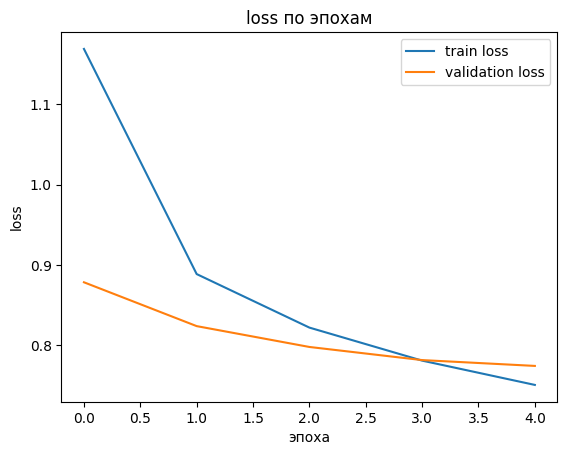

In [114]:
trainer.plot_loss()

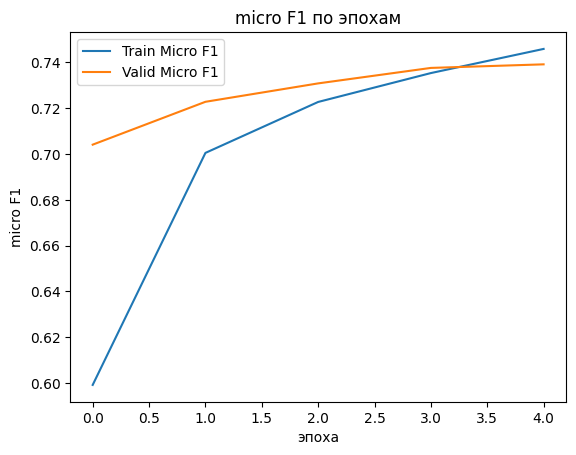

In [115]:
trainer.plot_metrics()